<a href="https://colab.research.google.com/github/000234768/proyecto_ia/blob/main/Proyecto_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alumnos: Juan Lavado y Matias Toledo

Cuadro de autoevaluación:
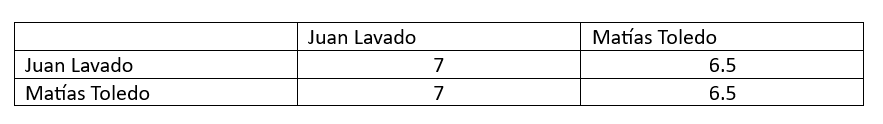

**METODOLOGIA: CRISP DM**

1.*Comprensión del problema*

**Titulo:**
*Detección Temprana de Ambliopía en Niños Utilizando Redes Neuronales Convolucionales en Lentes Inteligentes*

Presentación del proyecto:
La problemática abordada en este proyecto personal se centra en la detección temprana de la ambliopía, conocida comúnmente como "ojo perezoso", en niños. La ambliopía es una condición visual que puede afectar negativamente el desarrollo de la visión si no se trata a tiempo. Sin embargo, el acceso a exámenes oculares regulares y la detección temprana pueden ser un desafío en ciertas comunidades o áreas con recursos limitados.
Para abordar esta problemática, se propone una solución innovadora utilizando lentes inteligentes equipados con redes neuronales convolucionales (CNN). Estas redes neuronales son especialmente adecuadas para el procesamiento de imágenes y el reconocimiento de patrones visuales.
La posible solución consiste en desarrollar unos lentes inteligentes que permitan la detección continua y no invasiva de la ambliopía en niños. Estos lentes estarán equipados con cámaras de alta resolución y sensores oculares para capturar y analizar imágenes del entorno visual del niño. La información visual será procesada utilizando una arquitectura de red neuronal convolucional.
La elección de las redes neuronales convolucionales se basa en su capacidad para extraer características relevantes de las imágenes y reconocer patrones visuales específicos. Al entrenar y ajustar la CNN específicamente para la detección de ambliopía, se podrán identificar desalineaciones o movimientos oculares atípicos que podrían ser indicativos de la presencia de la condición.
El objetivo principal de este proyecto personal es brindar una solución accesible y efectiva para la detección temprana de la ambliopía en niños, sin la necesidad de que acudan constantemente al médico. Esto permitirá una intervención oportuna y un tratamiento adecuado, mejorando así el desarrollo visual y la calidad de vida de los niños afectados.
En conclusion, mediante el uso de lentes inteligentes y la implementación de una arquitectura de red neuronal convolucional, se busca proporcionar una herramienta innovadora que facilite la detección temprana de la ambliopía. Al aprovechar la capacidad de las CNN para procesar imágenes y reconocer patrones visuales, este proyecto busca marcar la diferencia en la salud visual de los niños al proporcionar una solución accesible y efectiva para la detección temprana de esta condición visual.


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError


url = "https://raw.githubusercontent.com/000234768/proyecto_ia/main/tblATS5Enroll.csv"  # URL DEL CSV

df = pd.read_csv(url)




2.*Comprension de los datos*

Estudio de datos

In [87]:
df.columns

Index(['PtID', 'VisitDt', 'Gender', 'Ethnicity', 'Race', 'HistoryDt',
       'PrRxNone', 'PrRxPatS', 'PrRxPatG', 'PrRxAtrp', 'PrRxFogg', 'PrRxOth',
       'PrRxOthDs', 'NoPrRx', 'NoPrSurg', 'NoCurVisTherOrth', 'NoAllergyAdh',
       'HxSpecUse12Mo', 'SpecCur', 'HxSphOD', 'HxCylOD', 'HxAxisOD', 'HxSphOS',
       'HxCylOS', 'HxAxisOS', 'CRTestDt', 'CRSphOD', 'CRCylOD', 'CRAxisOD',
       'CRSphOS', 'CRCylOS', 'CRAxisOS', 'VATestDt', 'VAInstrBright',
       'EVAMeasDist', 'EVACalibSize', 'VisAcuOD', 'VANoneOD', 'VASphOD',
       'VACylOD', 'VAAxisOD', 'CycOD', 'VisAcuOS', 'VANoneOS', 'VASphOS',
       'VACylOS', 'VAAxisOS', 'CycOS', 'ASOcuAlignDt', 'TropiaDi',
       'TropiaHSizeDi', 'TropHTypeDi', 'TropiaVSizeDi', 'TropVTypeDi',
       'TropiaNr', 'TropiaHSizeNr', 'TropHTypeNr', 'TropiaVSizeNr',
       'TropVTypeNr', 'Krimsky', 'PrStrbSurg', 'StrbType', 'Nystagmus',
       'OcuExamDt', 'AmbCrit', 'NoOcuCause', 'ParentUndProt', 'ParentHmPhone',
       'ParentNoRelo', 'SpecClass', 'RxSphOD

En el contexto de la detección temprana de ambliopía, utilizar datos específicos y relevantes es fundamental para desarrollar un modelo efectivo. A continuación se describen algunos datos y la razón por la cual sería necesario utilizarlos en el modelo:

Género (Gender): La prevalencia de la ambliopía puede variar entre hombres y mujeres. Incluir el género como dato permitiría al modelo considerar posibles diferencias en la incidencia y manifestación de la enfermedad en ambos sexos.

Historia de tratamiento previo de ambliopía (Prior amblyopia treatment): La información sobre tratamientos previos de ambliopía puede proporcionar importantes pistas sobre la presencia o recurrencia de la enfermedad. Esto permitiría al modelo evaluar si el paciente ha recibido tratamientos previos y cómo podrían influir en el diagnóstico y la detección de la ambliopía.

Datos de refracción (sfera, cilindro, eje) (Sph, Cyl, Axis): Los errores refractivos, como la miopía, la hipermetropía o el astigmatismo, pueden estar relacionados con la ambliopía. Incluir datos de refracción permitiría al modelo considerar estos factores y evaluar cómo podrían contribuir al diagnóstico de la enfermedad.

Agudeza visual (Visual acuity): La medición de la agudeza visual es esencial para evaluar la calidad de la visión y detectar posibles problemas de ambliopía. Incluir datos de agudeza visual permitiría al modelo utilizar esta información clave en su proceso de detección.

Presencia de estrabismo (TropiaDi, TropiaHSizeDi, TropHTypeDi, TropiaVSizeDi, TropVTypeDi): El estrabismo, la desalineación de los ojos, es una condición común asociada con la ambliopía. Incluir datos relacionados con la presencia de estrabismo permitiría al modelo identificar esta condición y su posible relación con la ambliopía.

Fecha del último examen ocular (OcuExamDt): La temporalidad de los datos es importante para evaluar la relevancia de los resultados. Incluir la fecha del último examen ocular permitiría al modelo considerar la información más actualizada y tener en cuenta los cambios en la condición del paciente a lo largo del tiempo.

Datos relacionados con el uso de lentes (HxSpecUse12Mo, SpecCur, SpecClass, RxSphOD, RxCylOD, RxAxisOD, RxSphOS, RxCylOS, RxAxisOS): Los datos relacionados con los lentes, como la historia de uso, la prescripción actual y las características específicas de la corrección óptica, son relevantes para evaluar la función visual y la necesidad de tratamientos específicos. Incluir estos datos permitiría al modelo tener en cuenta el estado actual de la corrección óptica del paciente.

utilizar datos específicos y relevantes en el modelo de detección de ambliopía proporcionaría información más completa y precisa para el diagnóstico y la detección temprana de la enfermedad. Estos datos permitirían al modelo considerar factores clave relacionados con la ambliopía, como el género, los tratamientos previos, los errores refractivos, la agudeza visual, el estrabismo, la temporalidad de los datos y el uso de lentes.


3. *Preparación de los datos*

In [88]:
# Obtener columnas con datos nulos
columnas_con_nulos = df.columns[df.isnull().any()]

# Mostrar las columnas con datos nulos
print(columnas_con_nulos)


Index(['PrRxNone', 'PrRxPatS', 'PrRxPatG', 'PrRxAtrp', 'PrRxFogg', 'PrRxOth',
       'PrRxOthDs', 'SpecCur', 'HxSphOD', 'HxCylOD', 'HxAxisOD', 'HxSphOS',
       'HxCylOS', 'HxAxisOS', 'CRCylOD', 'CRAxisOD', 'CRCylOS', 'CRAxisOS',
       'VANoneOD', 'VASphOD', 'VACylOD', 'VAAxisOD', 'CycOD', 'VANoneOS',
       'VASphOS', 'VACylOS', 'VAAxisOS', 'CycOS', 'TropiaDi', 'TropiaHSizeDi',
       'TropHTypeDi', 'TropiaVSizeDi', 'TropVTypeDi', 'TropiaNr',
       'TropiaHSizeNr', 'TropHTypeNr', 'TropiaVSizeNr', 'TropVTypeNr',
       'Krimsky', 'RxSphOD', 'RxCylOD', 'RxAxisOD', 'RxSphOS', 'RxCylOS',
       'RxAxisOS'],
      dtype='object')


In [89]:
# Contar los valores nulos en cada columna
total_nulos_por_columna = df.isnull().sum()

# Mostrar el número de valores nulos por columna
print(total_nulos_por_columna)


PtID           0
VisitDt        0
Gender         0
Ethnicity      0
Race           0
            ... 
RxCylOD      175
RxAxisOD     175
RxSphOS       69
RxCylOS      175
RxAxisOS     175
Length: 76, dtype: int64


**¿Por qué no eliminar las columnas con datos nulos, acaso esas columnas son importantes?**

'PrRxNone', 'PrRxPatS', 'PrRxPatG', 'PrRxAtrp', 'PrRxFogg', 'PrRxOth': Estas columnas parecen indican diferentes tipos de tratamientos previos para la ambliopía. Podrían proporcionar información sobre el historial de tratamiento de los pacientes.

'SpecCur': Esta columna indica la duración del uso actual de los anteojos. Puede ser útil para evaluar si los pacientes han estado usando los anteojos correctamente y durante cuánto tiempo.

'HxSphOD', 'HxCylOD', 'HxAxisOD', 'HxSphOS', 'HxCylOS', 'HxAxisOS': Estas columnas representan las correcciones de esfera, cilindro y eje para los ojos derecho e izquierdo en el historial. Proporcionan información sobre las características de la prescripción óptica previa.

'CRCylOD', 'CRAxisOD', 'CRCylOS', 'CRAxisOS': Estas columnas representan el cilindro y el eje de la refracción ciclóplega (refracción realizada después de la administración de gotas ciclóplegas). Pueden ser útiles para evaluar la necesidad de corrección adicional en comparación con el historial de prescripción óptica.

'VANoneOD', 'VASphOD', 'VACylOD', 'VAAxisOD', 'CycOD', 'VANoneOS', 'VASphOS', 'VACylOS', 'VAAxisOS', 'CycOS': Estas columnas representan la agudeza visual y la corrección utilizada para cada ojo, tanto en condiciones cíclopegas como no cíclopegas. Pueden ser útiles para evaluar la agudeza visual actual y el efecto de la corrección en los resultados visuales.

'TropiaDi', 'TropiaHSizeDi', 'TropHTypeDi', 'TropiaVSizeDi', 'TropVTypeDi', 'TropiaNr', 'TropiaHSizeNr', 'TropHTypeNr', 'TropiaVSizeNr', 'TropVTypeNr': Estas columnas indican la presencia y características de la tropía (desviación ocular) en diferentes distancias y direcciones. Pueden proporcionar información sobre los problemas de alineación ocular de los pacientes.

'Krimsky': Esta columna parece estar relacionada con la prueba de Krimsky utilizada para evaluar el alineamiento ocular. Puede ser útil para evaluar la desviación ocular y su magnitud.

'RxSphOD', 'RxCylOD', 'RxAxisOD', 'RxSphOS', 'RxCylOS', 'RxAxisOS': Estas columnas representan la prescripción esférica, cilíndrica y el eje de la corrección óptica actual. Son útiles para conocer la prescripción actual de los pacientes.

**Nota:**
*Es importante resaltar que estos datos aunque contengan datos nulos son importantes para nuestro estudio, porque nos ayudaria a identificar mejor las señales de ampliopia en los ojos de nuestros pacientes*

4. *Modelado de la solución utilizando la arquitectura de red neuronal feed-forward*

In [90]:
# Seleccionar las columnas relevantes
relevant_columns = ['Gender', 'Ethnicity', 'Race', 'HxSphOD', 'HxCylOD', 'HxAxisOD', 'HxSphOS', 'HxCylOS', 'HxAxisOS', 'VisAcuOD', 'VisAcuOS']
selected_data = df[relevant_columns]

In [91]:
# Función de conversión de fracción a decimal
def fraction_to_decimal(value):
    try:
        return float(value)
    except ValueError:
        parts = value.split('/')
        if len(parts) == 2:
            numerator = float(parts[0])
            denominator = float(parts[1])
            return numerator / denominator
        else:
            return None

In [92]:
# Aplicar la conversión a las columnas de agudeza visual
selected_data['VisAcuOD'] = selected_data['VisAcuOD'].apply(fraction_to_decimal)
selected_data['VisAcuOS'] = selected_data['VisAcuOS'].apply(fraction_to_decimal)

# Eliminar filas con valores nulos después de la conversión
selected_data = selected_data.dropna()

<ipython-input-92-88f7e501b307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['VisAcuOD'] = selected_data['VisAcuOD'].apply(fraction_to_decimal)
<ipython-input-92-88f7e501b307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['VisAcuOS'] = selected_data['VisAcuOS'].apply(fraction_to_decimal)


In [93]:
# Separar las características y las etiquetas
features = selected_data[['Gender', 'Ethnicity', 'Race', 'HxSphOD', 'HxCylOD', 'HxAxisOD', 'HxSphOS', 'HxCylOS', 'HxAxisOS']]
labels = selected_data[['VisAcuOD', 'VisAcuOS']]


In [94]:
# Codificar las características categóricas
encoder = LabelEncoder()
for column in features.columns:
    if features[column].dtype == 'object':
        features[column] = encoder.fit_transform(features[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajustar el número de neuronas en la capa de entrada
n_features = X_train.shape[1]

# Construir el modelo de la red neuronal
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_features,))) # La data
model.add(Dense(42, activation='relu'))
model.add(Dense(2))

# Compilar y entrenar el modelo
model.compile(optimizer=Adam(), loss='mse', metrics=[MeanSquaredError(), MeanAbsoluteError()])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Epoch 1/100


<ipython-input-94-b2ec29c41091>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = encoder.fit_transform(features[column])
<ipython-input-94-b2ec29c41091>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[column] = encoder.fit_transform(features[column])
<ipython-input-94-b2ec29c41091>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

2/2 [==============================] - 1s 207ms/step - loss: 0.4254 - mean_squared_error: 0.4254 - mean_absolute_error: 0.5594 - val_loss: 0.2623 - val_mean_squared_error: 0.2623 - val_mean_absolute_error: 0.4105
Epoch 2/100
2/2 [==============================] - 0s 60ms/step - loss: 0.3078 - mean_squared_error: 0.3078 - mean_absolute_error: 0.4570 - val_loss: 0.1845 - val_mean_squared_error: 0.1845 - val_mean_absolute_error: 0.3305
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2247 - mean_squared_error: 0.2247 - mean_absolute_error: 0.3767 - val_loss: 0.1382 - val_mean_squared_error: 0.1382 - val_mean_absolute_error: 0.2966
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.1645 - mean_squared_error: 0.1645 - mean_absolute_error: 0.3214 - val_loss: 0.1194 - val_mean_squared_error: 0.1194 - val_mean_absolute_error: 0.2841
Epoch 5/100
2/2 [==============================] - 0s 43ms/step - loss: 0.1333 - mean_squared_error: 0.1333 - mean_

In [95]:
# Obtener las métricas de entrenamiento
train_mse = history.history['mean_squared_error']
train_mae = history.history['mean_absolute_error']
val_mse = history.history['val_mean_squared_error']
val_mae = history.history['val_mean_absolute_error']





5. *Evaluación del modelo*

1/1 [==============================] - 0s 57ms/step


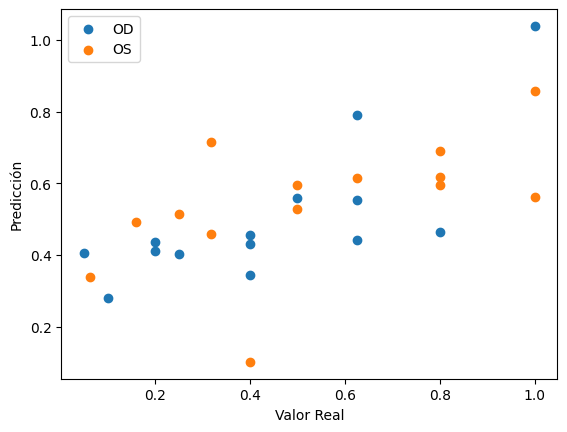

In [96]:
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo en el conjunto de prueba
predictions = model.predict(X_test)

# Graficar las predicciones frente a los valores reales
plt.scatter(y_test['VisAcuOD'], predictions[:, 0], label='OD')
plt.scatter(y_test['VisAcuOS'], predictions[:, 1], label='OS')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()


1/1 [==============================] - 0s 23ms/step


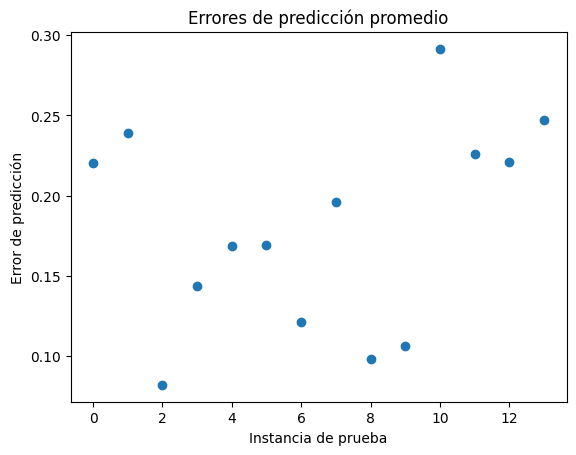

In [97]:
# Obtener las predicciones del modelo en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular los errores de predicción
errors = np.abs(predictions - y_test.values)

# Calcular el error promedio para cada instancia de prueba
mean_errors = np.mean(errors, axis=1)

# Crear un gráfico de dispersión de los errores de predicción
plt.scatter(range(len(mean_errors)), mean_errors)
plt.xlabel('Instancia de prueba')
plt.ylabel('Error de predicción')
plt.title('Errores de predicción promedio')
plt.show()

In [99]:
# Normalizar los datos
scaler = MinMaxScaler()
features_normalized = scaler.fit_transform(features)
# Definir el número de divisiones (k) para la validación cruzada
k = 5

# Crear los conjuntos de entrenamiento y prueba usando validación cruzada
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Listas para almacenar las métricas de evaluación en cada iteración de validación cruzada
mse_scores = []
mae_scores = []

# Iterar sobre los conjuntos de entrenamiento y prueba generados por la validación cruzada
for train_index, test_index in kf.split(features_normalized):
    X_train, X_test = features_normalized[train_index], features_normalized[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

    # Construir y entrenar el modelo
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(9,)))
    model.add(Dense(42, activation='relu'))
    model.add(Dense(2))
    model.compile(optimizer=Adam(), loss='mse', metrics=[MeanSquaredError(), MeanAbsoluteError()])
    model.fit(X_train, y_train, epochs=100, batch_size=42, verbose=0)

    # Evaluar el modelo en el conjunto de prueba
    loss, mse, mae = model.evaluate(X_test, y_test, verbose=0)

    # Almacenar las métricas de evaluación
    mse_scores.append(mse)
    mae_scores.append(mae)

# Calcular la media y desviación estándar de las métricas de evaluación
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

# Imprimir los resultados
print("Mean Squared Error (MSE) - Mean:", mean_mse, "Std:", std_mse)
print("Mean Absolute Error (MAE) - Mean:", mean_mae, "Std:", std_mae)


Mean Squared Error (MSE) - Mean: 0.0765093870460987 Std: 0.016495953726404514
Mean Absolute Error (MAE) - Mean: 0.22833346128463744 Std: 0.022709935231082414


Error cuadrático medio (MSE) bajo: Un MSE promedio de 0.0765 indica que, en promedio, las predicciones del modelo tienen un error cuadrático medio relativamente bajo en comparación con los valores reales de la agudeza visual. Esto sugiere que el modelo es capaz de ajustarse adecuadamente a los datos y realizar predicciones cercanas a los valores reales. Un bajo MSE es deseable en este proyecto, ya que implica una buena capacidad del modelo para predecir con precisión la agudeza visual.

Error absoluto medio (MAE) bajo: Un MAE promedio de 0.2283 significa que, en promedio, las predicciones del modelo tienen un error absoluto medio relativamente bajo en comparación con los valores reales. Esto indica que el modelo tiende a cometer errores menores en sus predicciones. Un bajo MAE es beneficioso en el contexto del proyecto, ya que implica una buena precisión en la predicción de la agudeza visual.

Bajas desviaciones estándar: Las desviaciones estándar de 0.0165 para MSE y 0.0227 para MAE indican que las medidas de error tienen una dispersión relativamente baja alrededor de sus promedios. Esto sugiere que el modelo es consistente en su rendimiento en diferentes conjuntos de datos y evita fluctuaciones significativas en las predicciones. Una baja variabilidad en las medidas de error es valiosa, ya que indica una estabilidad en el rendimiento del modelo.

En general, estos resultados de la validación cruzada indican que el modelo de redes neuronales tiene un buen desempeño en la predicción de la agudeza visual para el proyecto. La combinación de un bajo MSE, un bajo MAE y bajas desviaciones estándar sugiere que el modelo es preciso, estable y capaz de realizar predicciones confiables.

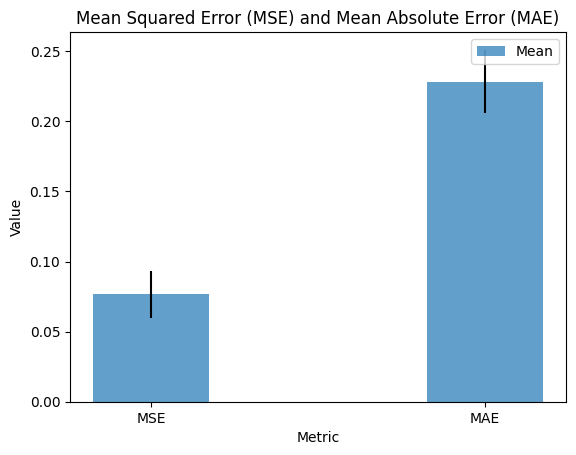

In [100]:
# Datos de validación cruzada
mse_mean = 0.0765093870460987
mse_std = 0.016495953726404514
mae_mean = 0.22833346128463744
mae_std = 0.022709935231082414

# Configuración del gráfico
labels = ['MSE', 'MAE']
means = [mse_mean, mae_mean]
stds = [mse_std, mae_std]

x = range(len(labels))
width = 0.35

# Crear el gráfico de barras
fig, ax = plt.subplots()
rects1 = ax.bar(x, means, width, yerr=stds, label='Mean', alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Metric')
ax.set_ylabel('Value')
ax.set_title('Mean Squared Error (MSE) and Mean Absolute Error (MAE)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Mostrar el gráfico
plt.show()

1/1 [==============================] - 0s 21ms/step


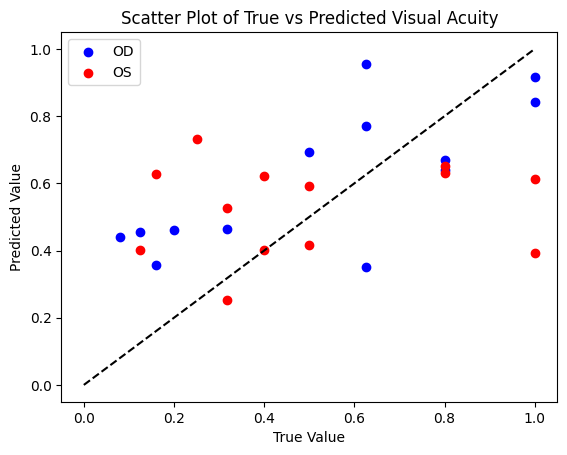

In [107]:
# Obtener las predicciones del modelo en el conjunto de prueba
y_pred = model.predict(X_test)

# Extraer los valores de agudeza visual predichos para cada ojo
pred_od = y_pred[:, 0]
pred_os = y_pred[:, 1]

# Crear el gráfico de dispersión
plt.scatter(y_test['VisAcuOD'], pred_od, color='blue', label='OD')
plt.scatter(y_test['VisAcuOS'], pred_os, color='red', label='OS')

# Línea de referencia (predicción perfecta)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Etiquetas y título del gráfico
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Scatter Plot of True vs Predicted Visual Acuity')

# Leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

Como podemos observar en el grafico de entrenamiento, aún presentamos fallas en el modelo, pero podemos seguir trabajando en ello, por lo que se consideraria un avance significativo para nuestro modelo.

6. *Despliegue del modelo*

In [109]:
# Actualmente no tenemos una plataforma desarrollada exclusivamente para este modelo beta, pero lo colocaremos en un repositorio
# De github para su constante modificacion y avance, además cabe destacar que la data obtenida a través de https://public.jaeb.org/pedig/stdy
# Y otros archivos que ayuden a la comprensión del proyecto
# Modelo guardado

model.save('modelo_ia.h5')

# from tensorflow.keras.models import load_model

# Cargar el modelo previamente entrenado
# model = load_model('modelo_ia.h5')

